# Exercises 04

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

## Exercise 04.2 - Moleculecular Dynamics Simulation

All pictures are done in reduced units.

For every physical phase three different simulations are presented: the first one to understand how much does the temperature change after the first step, the second to equilibrate the system, the third one to study the actual behaviour.

For every phase there is directory named "frames" where the configuration of the simulation can be found. From those we can observe clearly that each physical phase behaves correctly.

### Solid phase

#### <span style="color:green"> Finding the right temperature <span>

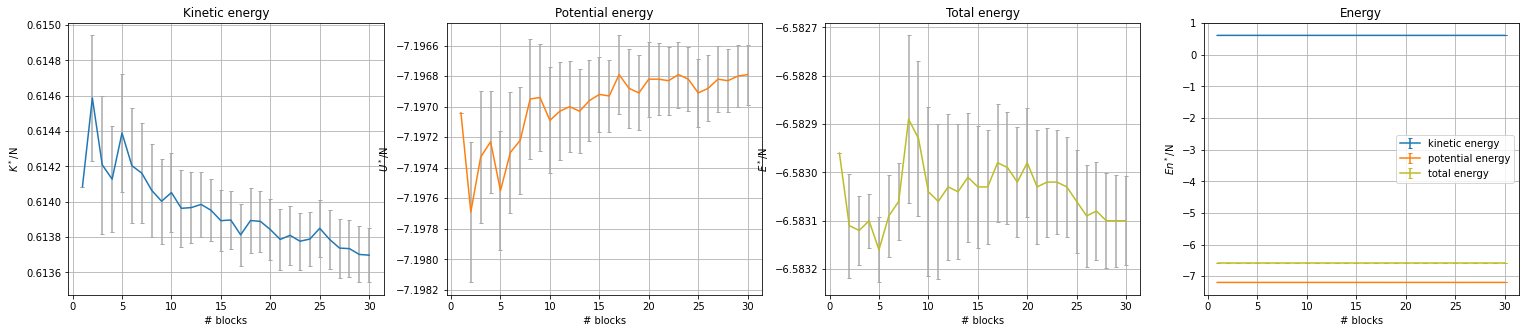

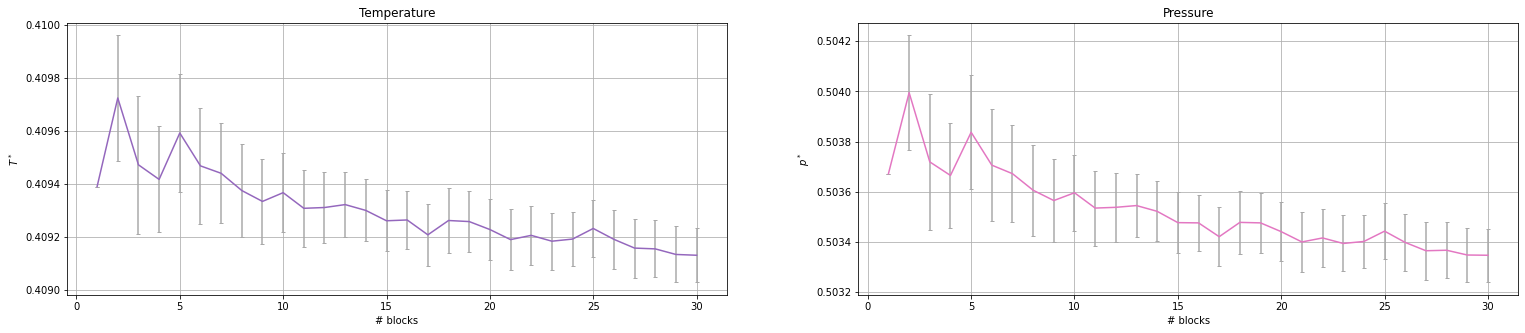

In [3]:
path = "Solido/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

The graphs are done with a starting temperature of $T^*=0.8$ and, as shown in the penultimate graph, the temperature reduces its value by almost half.

Therefore after many try, we found that the optimal starting temperature to obtain a $T^*=0.8$ is $T=1.5411$.

#### <span style="color:green"> Not equilibrated <span>

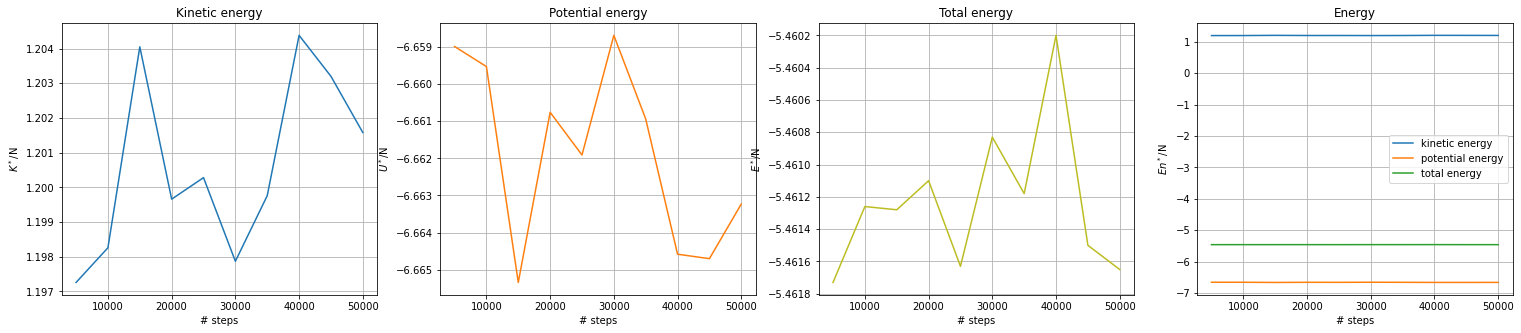

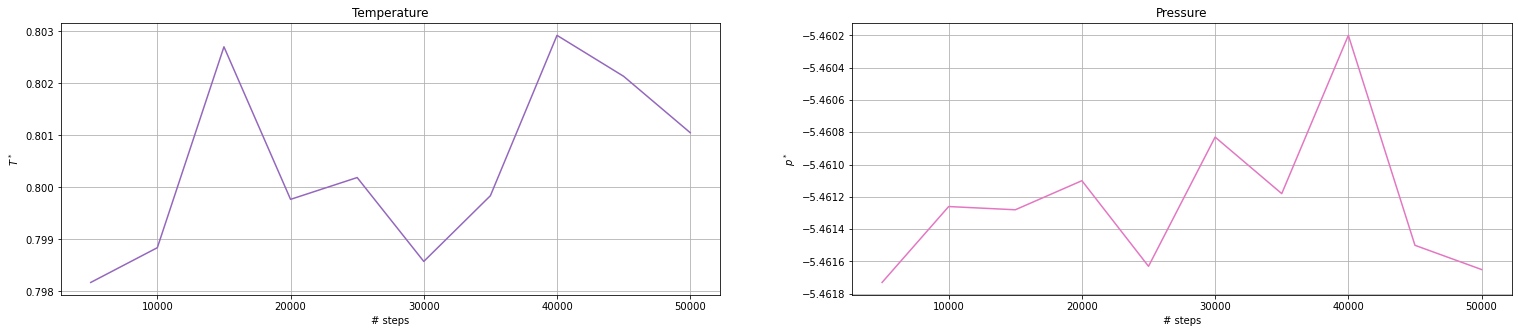

In [16]:
path = "Solido/non_equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Solido/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Solido/non_equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Solido/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Solido/non_equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))

x_ekin*=5000
x_epot*=5000
x_etot*=5000
x_pres*=5000
x_temp*=5000


ax1.plot(x_ekin,ekin, label = 'kinetic energy')
ax1.set_xlabel('# steps')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.plot(x_etot,etot, label = 'total energy', c = "tab:olive")
ax3.set_xlabel('# steps')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.plot(x_temp,temp, label = 'temperature', c = "tab:purple")
ax4.set_xlabel('# steps')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.plot(x_etot,etot, label = 'pressure', c = "tab:pink")
ax5.set_xlabel('# steps')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.plot(x_ekin,ekin, label = 'kinetic energy')
ax6.plot(x_epot,epot, label = 'potential energy')
ax6.plot(x_etot,etot, label = 'total energy')
ax6.set_xlabel('# steps')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

The equilibration was only done with 50000 steps, because the starting point was already a crystal lattice.

#### <span style="color:green"> Equilibrated <span>

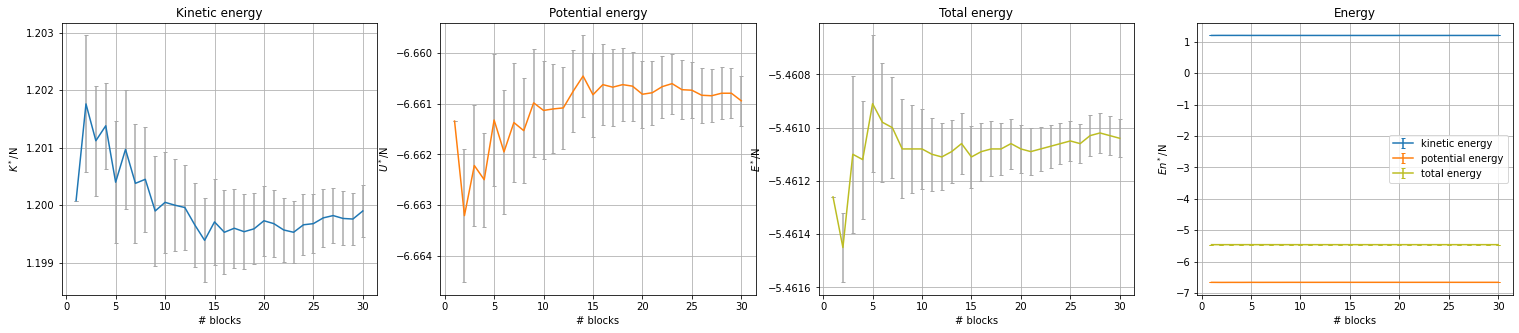

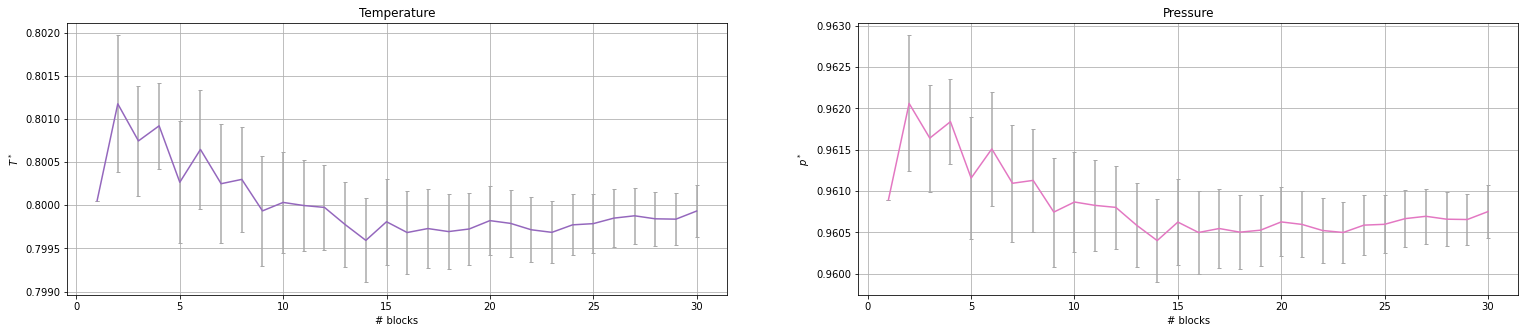

In [4]:
path = "Solido/equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Solido/equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

The final temperature oscillates around the wanted value.

#### <span style="color:green"> Temperature and pressure before and after equilibrium <span>

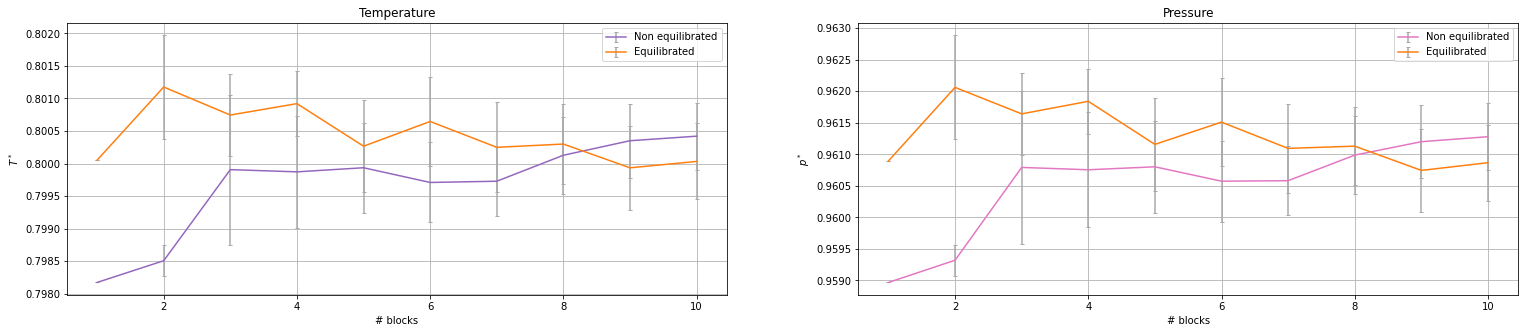

In [5]:
path = "Solido/non_equilibrato/output_temp.dat"
path1 = "Solido/equilibrato/output_temp.dat"

x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_temp_eq, temp_eq, err_temp_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true', max_rows=10)

path = "Solido/non_equilibrato/output_pres.dat"
path1 = "Solido/equilibrato/output_pres.dat"

x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_pres_eq, pres_eq, err_pres_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true', max_rows=10)

fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_temp,temp,yerr=err_temp, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:purple")
ax1.errorbar(x_temp_eq,temp_eq,yerr=err_temp_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$T^*$')
ax1.grid("True")
ax1.set_title("Temperature", size = 12)
ax1.legend()

ax2.errorbar(x_pres,pres,yerr=err_pres, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:pink")
ax2.errorbar(x_pres_eq,pres_eq,yerr=err_pres_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$p^*$')
ax2.grid("True")
ax2.set_title("Pressure", size = 12)
ax2.legend()


plt.show()

After the equilibration both the temperature and the pressure are more stable. The energy on the other end was stable even before the equilibration time as it should be. In fact, this algorithm aims to conserve the total energy of the system.

### Liquid Phase

#### <span style="color:green"> Finding the right temperature <span>

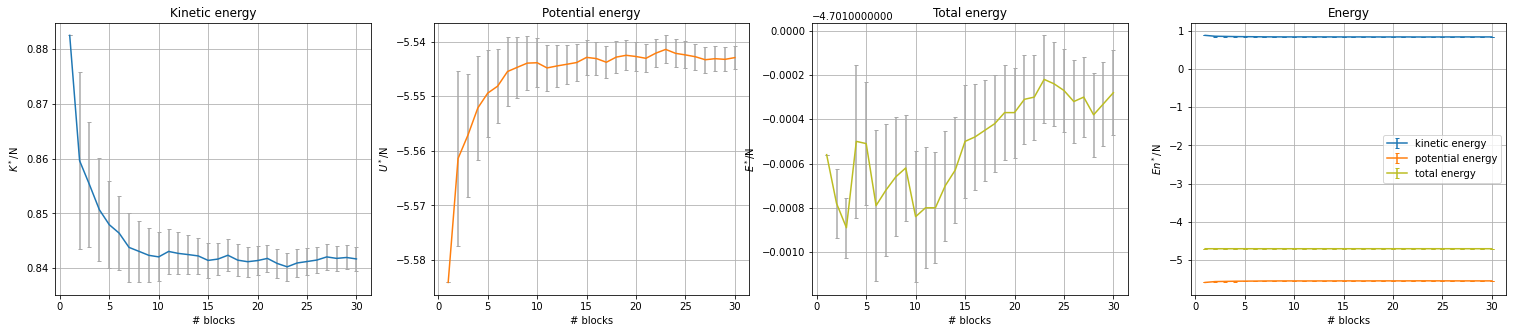

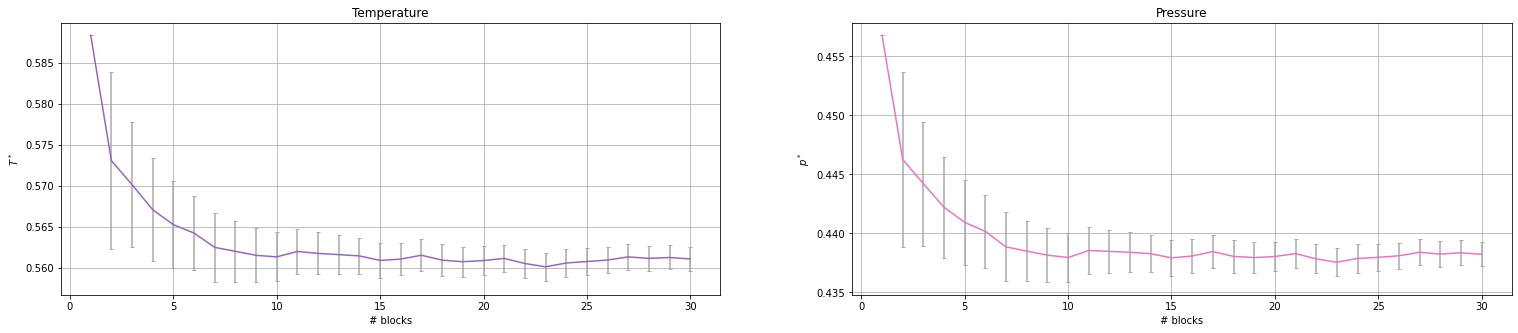

In [6]:
path = "Liquido/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

Using the same method used for the solid phase, we found that the optimal starting temperature to obtain a $T^*=1.1$ is $T=1.986$.

#### <span style="color:green"> Not equilibrated <span>

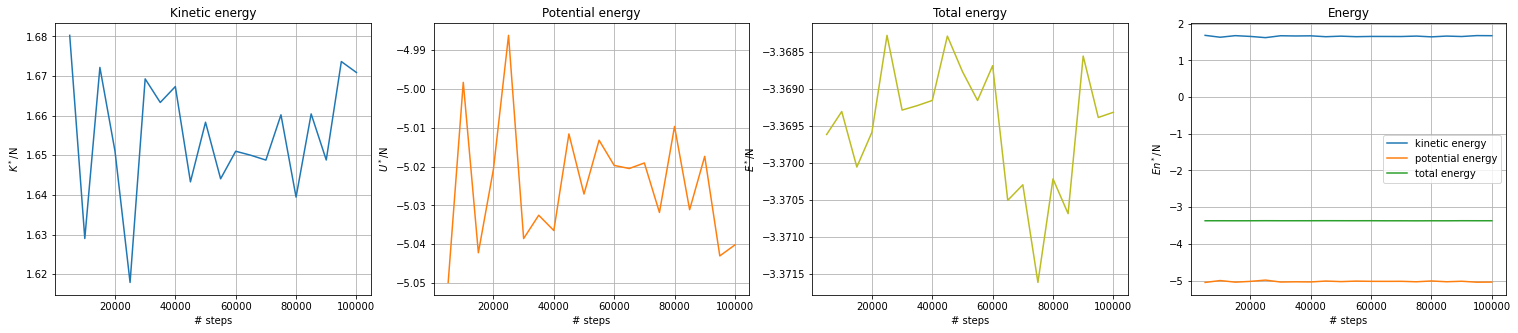

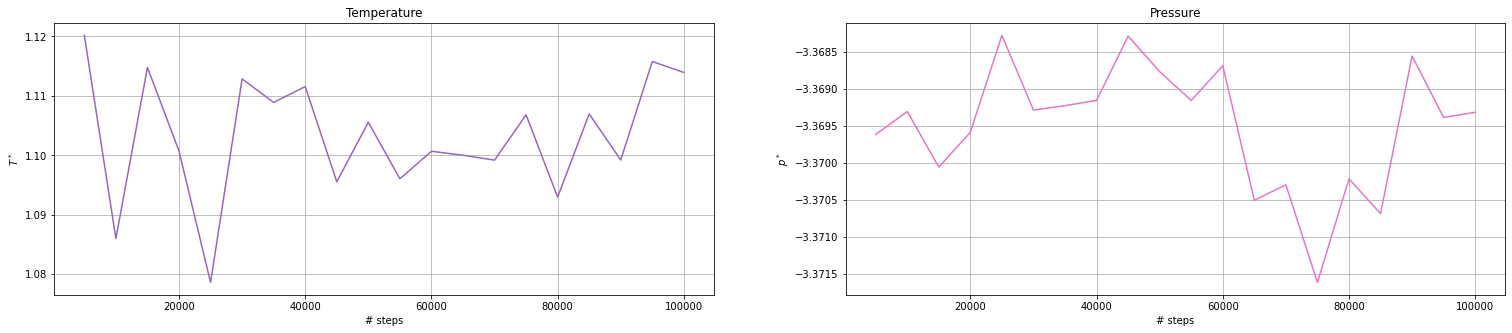

In [19]:
path = "Liquido/non_equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Liquido/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Liquido/non_equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Liquido/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Liquido/non_equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')


fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


x_ekin*=5000
x_epot*=5000
x_etot*=5000
x_pres*=5000
x_temp*=5000


ax1.plot(x_ekin,ekin, label = 'kinetic energy')
ax1.set_xlabel('# steps')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.plot(x_etot,etot, label = 'total energy', c = "tab:olive")
ax3.set_xlabel('# steps')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.plot(x_temp,temp, label = 'temperature', c = "tab:purple")
ax4.set_xlabel('# steps')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.plot(x_etot,etot, label = 'pressure', c = "tab:pink")
ax5.set_xlabel('# steps')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.plot(x_ekin,ekin, label = 'kinetic energy')
ax6.plot(x_epot,epot, label = 'potential energy')
ax6.plot(x_etot,etot, label = 'total energy')
ax6.set_xlabel('# steps')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

The equilibration this time was done over 100000 steps, to give time to the crystal to melt.

#### <span style="color:green"> Equilibrated <span>

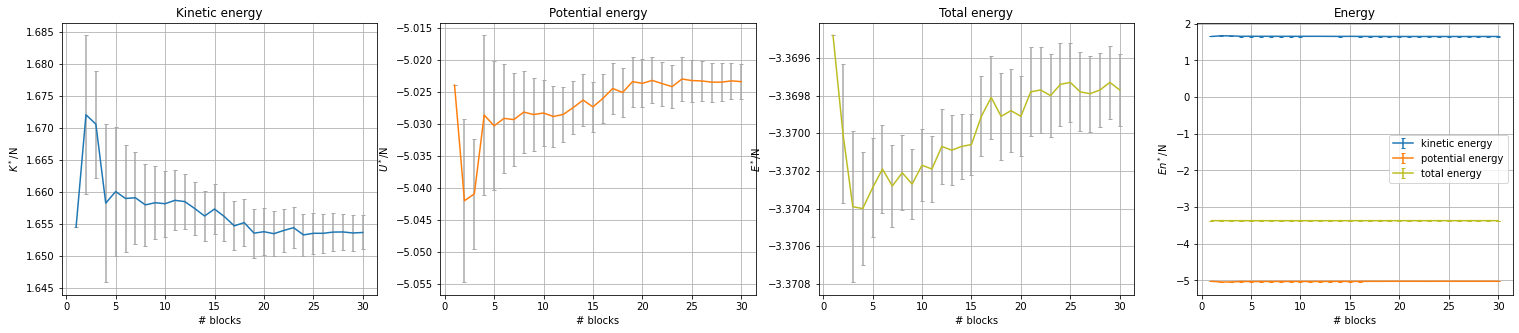

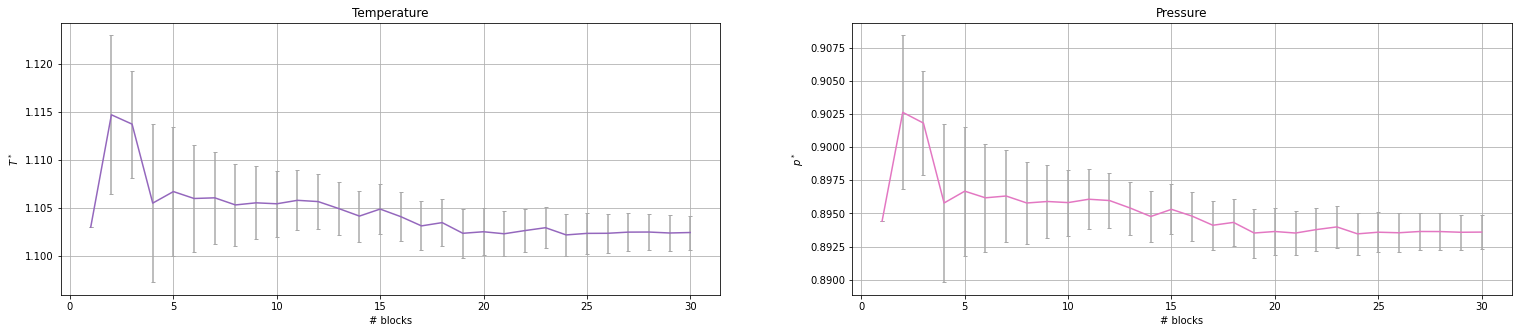

In [7]:
path = "Liquido/equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Liquido/equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()
plt.show()

#### <span style="color:green"> Temperature and pressure before and after equilibrium <span>

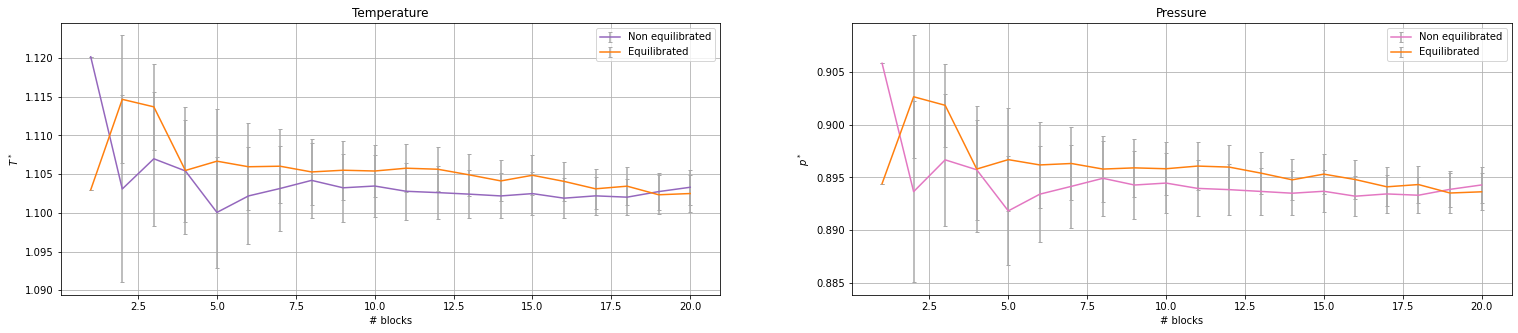

In [52]:
path = "Liquido/non_equilibrato/output_temp.dat"
path1 = "Liquido/equilibrato/output_temp.dat"

x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_temp_eq, temp_eq, err_temp_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true', max_rows=20)

path = "Liquido/non_equilibrato/output_pres.dat"
path1 = "Liquido/equilibrato/output_pres.dat"

x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_pres_eq, pres_eq, err_pres_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true', max_rows=20)

fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_temp,temp,yerr=err_temp, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:purple")
ax1.errorbar(x_temp_eq,temp_eq,yerr=err_temp_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$T^*$')
ax1.grid("True")
ax1.set_title("Temperature", size = 12)
ax1.legend()

ax2.errorbar(x_pres,pres,yerr=err_pres, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:pink")
ax2.errorbar(x_pres_eq,pres_eq,yerr=err_pres_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$p^*$')
ax2.grid("True")
ax2.set_title("Pressure", size = 12)
ax2.legend()


plt.show()

### Gas Phase

#### <span style="color:green"> Finding the right temperature <span>

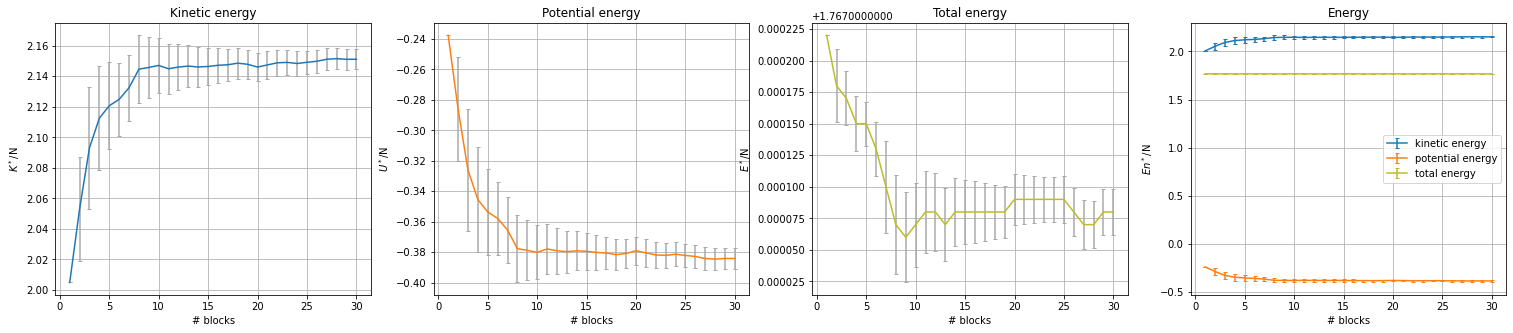

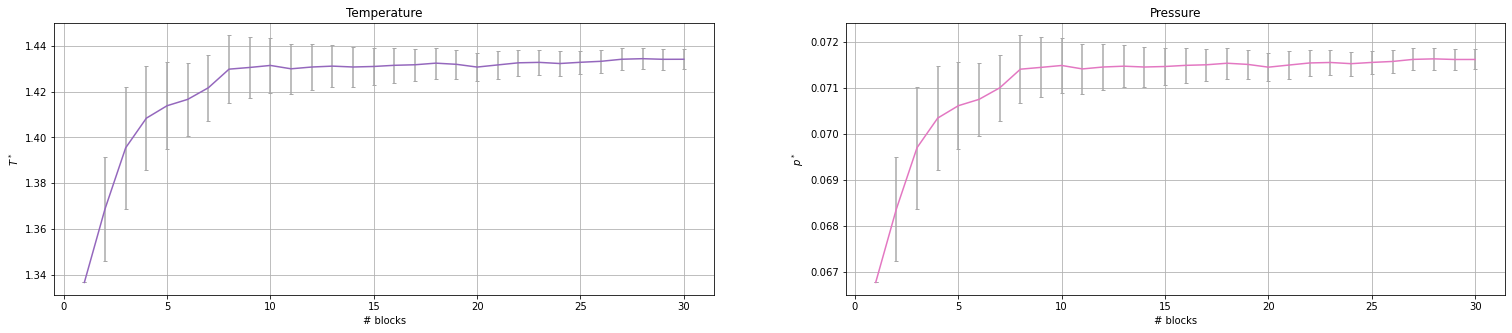

In [8]:
path = "Gas/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')


fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

Once again we found that the optimal starting temperature to obtain a $T^*=1.2$ is $T=0.95$

#### <span style="color:green"> Not equilibrated <span>

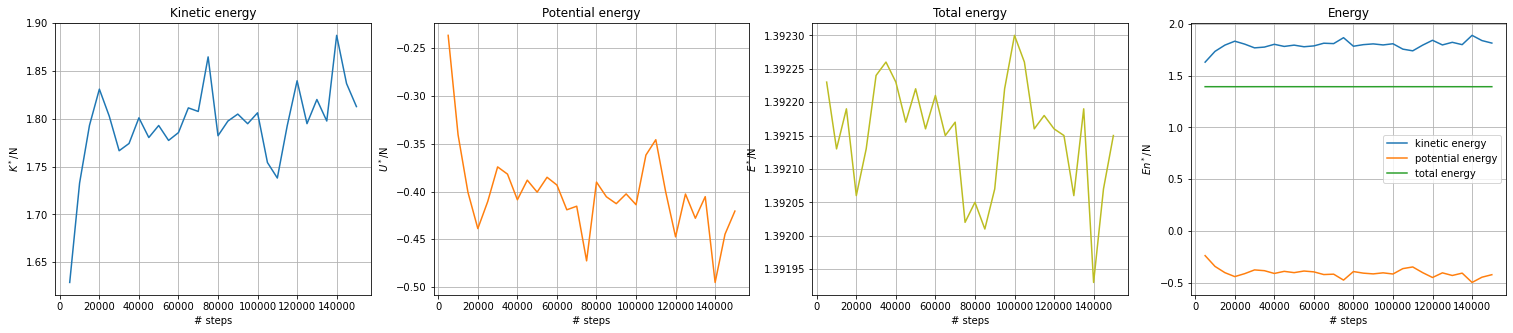

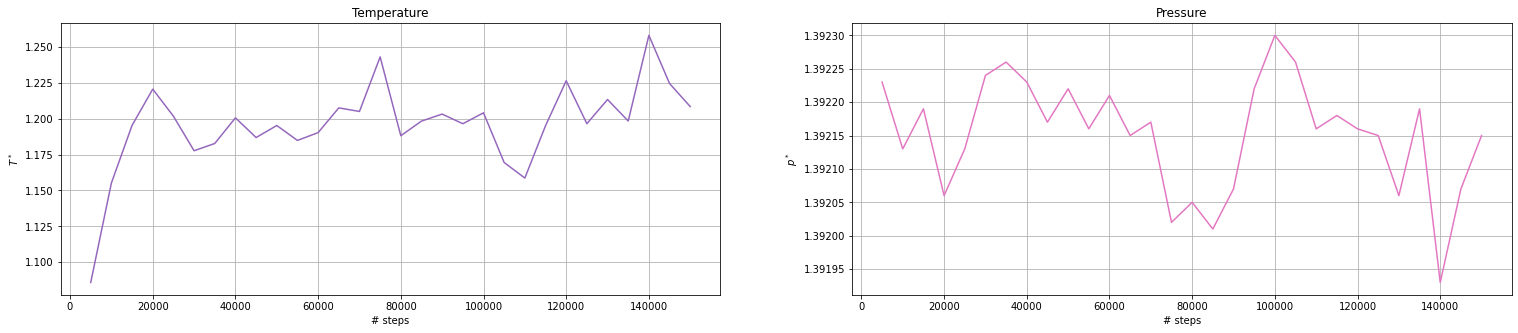

In [18]:
path = "Gas/non_equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Gas/non_equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Gas/non_equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Gas/non_equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')

path = "Gas/non_equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 1, 3), unpack='true')


fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


x_ekin*=5000
x_epot*=5000
x_etot*=5000
x_pres*=5000
x_temp*=5000


ax1.plot(x_ekin,ekin, label = 'kinetic energy')
ax1.set_xlabel('# steps')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.plot(x_epot,epot, label = 'potential energy', c = "tab:orange")
ax2.set_xlabel('# steps')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.plot(x_etot,etot, label = 'total energy', c = "tab:olive")
ax3.set_xlabel('# steps')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.plot(x_temp,temp, label = 'temperature', c = "tab:purple")
ax4.set_xlabel('# steps')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.plot(x_etot,etot, label = 'pressure', c = "tab:pink")
ax5.set_xlabel('# steps')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.plot(x_ekin,ekin, label = 'kinetic energy')
ax6.plot(x_epot,epot, label = 'potential energy')
ax6.plot(x_etot,etot, label = 'total energy')
ax6.set_xlabel('# steps')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()

plt.show()

In this case the equilibration was even longer and was done over 150000 blocks.

#### <span style="color:green"> Equilibrated <span>

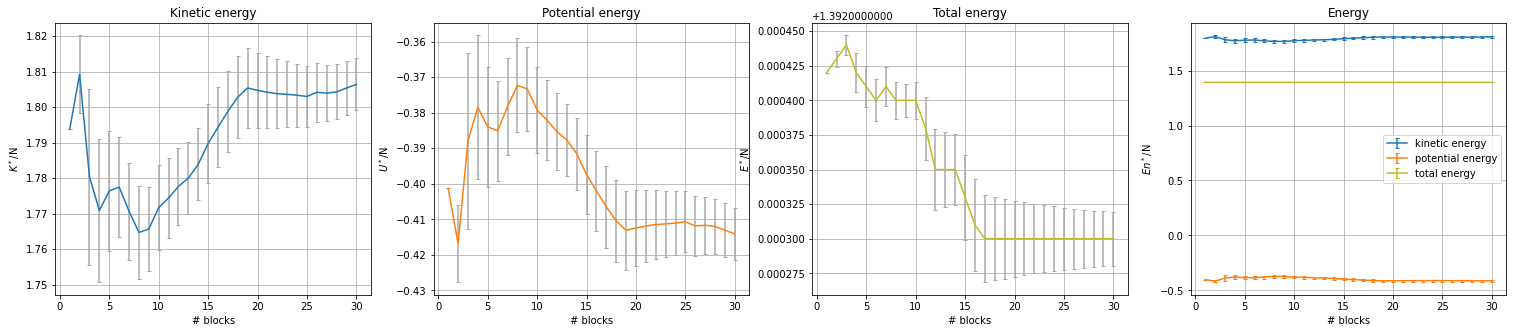

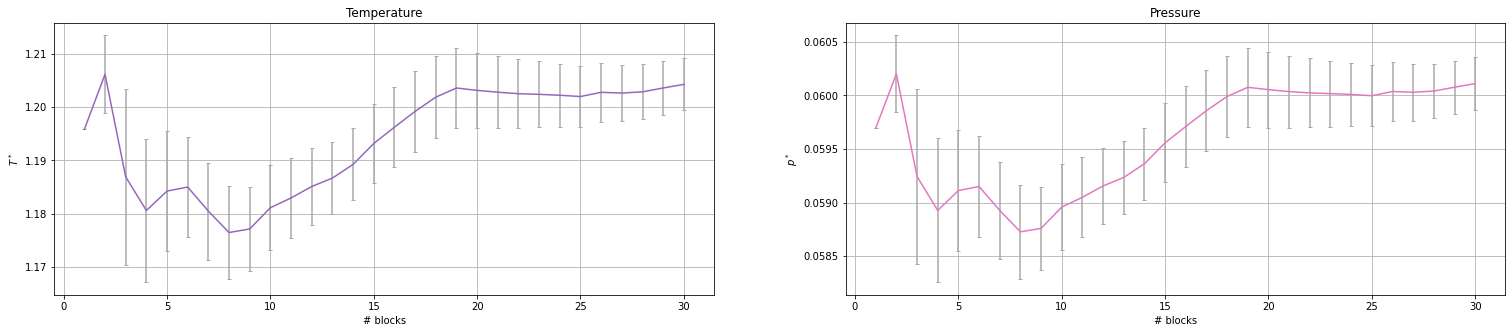

In [9]:
path = "Gas/equilibrato/output_ekin.dat"
x_ekin, ekin, err_ekin = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/equilibrato/output_epot.dat"
x_epot, epot, err_epot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/equilibrato/output_etot.dat"
x_etot, etot, err_etot = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/equilibrato/output_pres.dat"
x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

path = "Gas/equilibrato/output_temp.dat"
x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')

fig1, (ax1, ax2, ax3, ax6)=plt.subplots(1,4,  figsize=(26, 5))
fig2, (ax4, ax5)=plt.subplots(1,2,  figsize=(26, 5))


ax1.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', ecolor = "darkgray", capsize = 2)
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$K^*$/N')
ax1.grid("True")
ax1.set_title("Kinetic energy", size = 12)

ax2.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", ecolor = "darkgray", capsize = 2)
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$U^*$/N')
ax2.grid("True")
ax2.set_title("Potential energy", size = 12)

ax3.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", ecolor = "darkgray", capsize = 2)
ax3.set_xlabel('# blocks')
ax3.set_ylabel('$E^*$/N')
ax3.grid("True")
ax3.set_title("Total energy", size = 12)

ax4.errorbar(x_temp,temp,yerr=err_temp, label = 'temperature', c = "tab:purple", ecolor = "darkgray", capsize = 2)
ax4.set_xlabel('# blocks')
ax4.set_ylabel('$T^*$')
ax4.grid("True")
ax4.set_title("Temperature", size = 12)

ax5.errorbar(x_pres,pres,yerr=err_pres, label = 'pressure', c = "tab:pink", ecolor = "darkgray", capsize = 2)
ax5.set_xlabel('# blocks')
ax5.set_ylabel('$p^*$')
ax5.grid("True")
ax5.set_title("Pressure", size = 12)

ax6.errorbar(x_ekin,ekin,yerr=err_ekin, label = 'kinetic energy', color="tab:blue", capsize = 2)
ax6.errorbar(x_epot,epot,yerr=err_epot, label = 'potential energy', c = "tab:orange", capsize = 2)
ax6.errorbar(x_etot,etot,yerr=err_etot, label = 'total energy', c = "tab:olive", capsize = 2)
ax6.set_xlabel('# blocks')
ax6.set_ylabel('$En^*$/N')
ax6.grid("True")
ax6.set_title("Energy", size = 12)
ax6.legend()


plt.show()

Even after a long equilibration time, the gas phase fluctuates still a lot more than the other phases.

#### <span style="color:green"> Temperature and pressure before and after equilibrium <span>

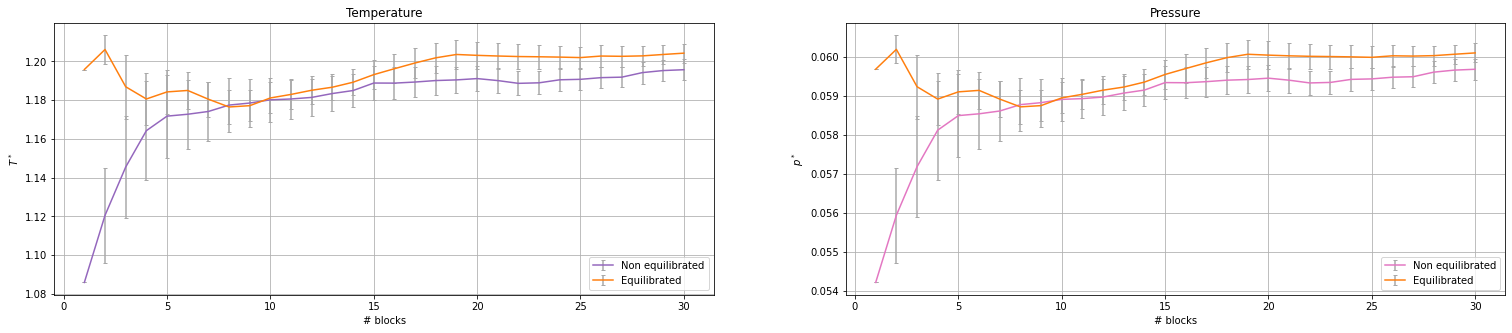

In [64]:
path = "Gas/non_equilibrato/output_temp.dat"
path1 = "Gas/equilibrato/output_temp.dat"

x_temp, temp, err_temp = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_temp_eq, temp_eq, err_temp_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true')

path = "Gas/non_equilibrato/output_pres.dat"
path1 = "Gas/equilibrato/output_pres.dat"

x_pres, pres, err_pres = np.loadtxt(path, usecols=(0, 2, 3), unpack='true')
x_pres_eq, pres_eq, err_pres_eq = np.loadtxt(path1, usecols=(0, 2, 3), unpack='true')

fig, (ax1, ax2)=plt.subplots(1,2,  figsize=(26, 5))

ax1.errorbar(x_temp,temp,yerr=err_temp, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:purple")
ax1.errorbar(x_temp_eq,temp_eq,yerr=err_temp_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax1.set_xlabel('# blocks')
ax1.set_ylabel('$T^*$')
ax1.grid("True")
ax1.set_title("Temperature", size = 12)
ax1.legend()

ax2.errorbar(x_pres,pres,yerr=err_pres, label = 'Non equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:pink")
ax2.errorbar(x_pres_eq,pres_eq,yerr=err_pres_eq, label = 'Equilibrated', ecolor = "darkgray", capsize = 2, color = "tab:orange")
ax2.set_xlabel('# blocks')
ax2.set_ylabel('$p^*$')
ax2.grid("True")
ax2.set_title("Pressure", size = 12)
ax2.legend()


plt.show()

The difference between the non equilibrated values and the equilibrated ones is, in this case, bigger, because a gas phase  is very far from the original configuration